<div class="alert alert-block alert-secondary" style="font-size:14px; font-family:verdana; background-color:#d3d3d3; color:#555555;">
    📌 Welcome to this notebook! In this guide, we will build a Convolutional Neural Network (CNN) from scratch for image classification. While pretrained models often deliver superior accuracy for many datasets, this isn’t universally applicable. This notebook focuses on constructing a CNN entirely from the ground up, showcasing how to develop a model without relying on pretrained weights.
</div>

<div class="alert alert-block alert-secondary" style="font-size:14px; font-family:verdana; background-color:#d3d3d3; color:#555555;">
    📌 Business Use: This dataset was chosen for its potential business applications. The fruit and vegetable classification model can be used in mobile apps to identify grocery items from a picture and suggest recipes based on those ingredients. Another potential application is in stores like Amazon Go, where cameras detect and classify items picked by customers, enabling a checkout-free shopping experience.
</div>

## 1. Dataset Information


**Overview:**
This dataset comprises images of various fruits and vegetables, intended for image classification tasks. It includes:

- **Fruits:** Banana, Apple, Pear, Grapes, Orange, Kiwi, Watermelon, Pomegranate, Pineapple, Mango
- **Vegetables:** Cucumber, Carrot, Capsicum, Onion, Potato, Lemon, Tomato, Radish, Beetroot, Cabbage, Lettuce, Spinach, Soybean, Cauliflower, Bell Pepper, Chilli Pepper, Turnip, Corn, Sweetcorn, Sweet Potato, Paprika, Jalapeño, Ginger, Garlic, Peas, Eggplant

**Data:**
- **Train Set:** 100 images per category.
- **Test Set:** 10 images per category.
- **Validation Set:** 10 images per category.

Images are organized into subfolders for each fruit and vegetable type within these sets.

**Data Source:**
Images were collected using Bing Image Search for a personal image recognition project. The creator does not own the rights to these images. If you are the owner of any image and have concerns, please contact the creator for removal. The creator will address such requests to ensure compliance with legal obligations.


## 2. Data Visualization

### 2.1 Dataset Sample

In [2]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define the path to your test directory
vis_dir = 'dataset/train'

# Get the list of all subdirectories (classes)
classes = os.listdir(vis_dir)

# Initialize an empty list to store file paths
image_paths = []

# Loop through each class folder and collect a few image paths
for cls in classes:
    class_dir = os.path.join(vis_dir, cls)
    images = os.listdir(class_dir)
    for img in images:
        image_paths.append(os.path.join(class_dir, img))

# Randomly select 16 images from the test set
random_images = random.sample(image_paths, 16)

# Set up a 4x4 grid for plotting
fig, axes = plt.subplots(4, 4, figsize=(10, 10))

# Loop through the grid and add an image to each subplot
for i, ax in enumerate(axes.flat):
    img = mpimg.imread(random_images[i])
    ax.imshow(img)
    ax.axis('off')  # Hide axes

# Display the plot
plt.show()


ModuleNotFoundError: No module named 'matplotlib'

<div class="alert alert-block alert-secondary" style="font-size:14px; font-family:verdana; background-color:#d3d3d3; color:#555555;">
    📌 As you can see in this plot, the images are in different shapes, which can be challenging for our model. To address this issue, we will resize the images to a uniform size later in Section 3
</div>

### 2.2 Training Data Distribution

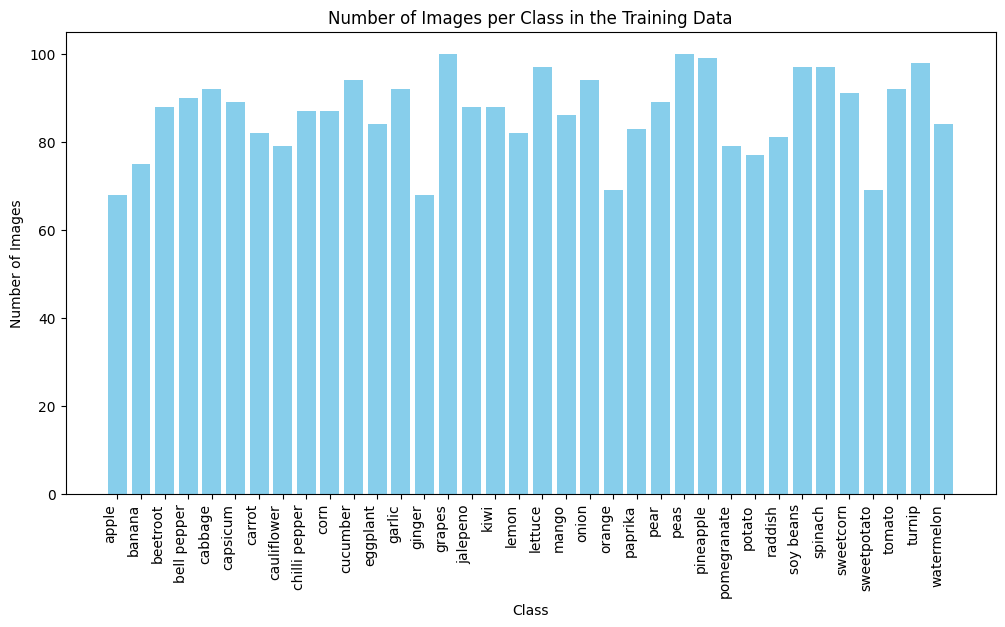

In [3]:
# Get the list of all subdirectories (classes)
classes = os.listdir(vis_dir)

# Count the number of images in each class
image_count = {cls: len(os.listdir(os.path.join(vis_dir, cls))) for cls in classes}

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(image_count.keys(), image_count.values(), color='skyblue')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Number of Images per Class in the Training Data')
plt.xticks(rotation=90, ha='right')  # Rotate class names for better readability
plt.show()

<div class="alert alert-block alert-secondary" style="font-size:14px; font-family:verdana; background-color:#d3d3d3; color:#555555;">
    📌 The train dataset is balanced, which is ideal. Since there is no extreme data imbalance, heavy data augmentation is unnecessary.
</div>

### 2.3 Test Data Distribution

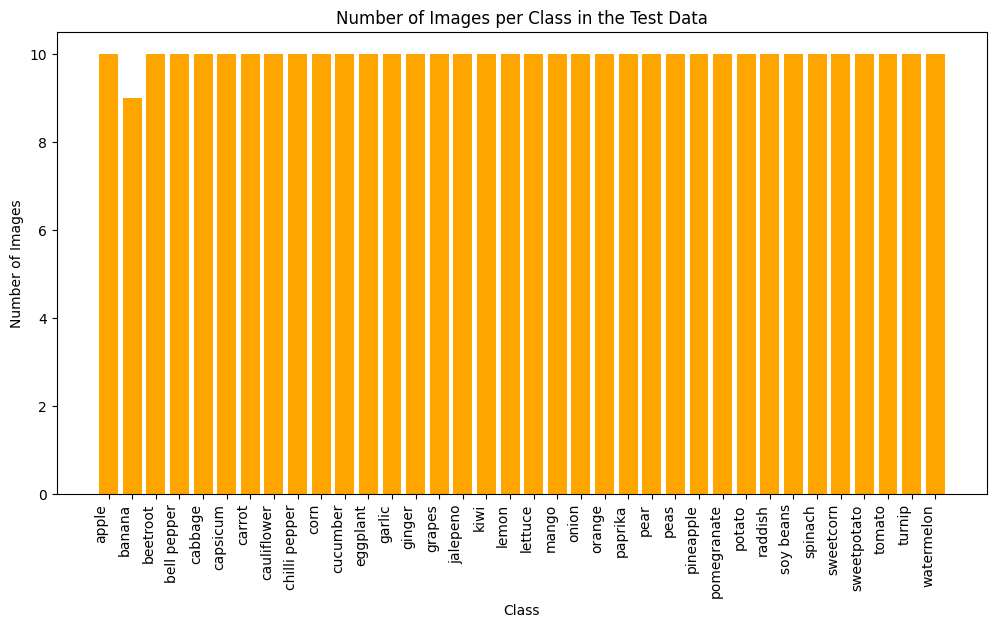

In [4]:
test_vis_dir = 'dataset/test'

# Get the list of all subdirectories (classes)
classes = os.listdir(test_vis_dir)

# Count the number of images in each class
image_count = {cls: len(os.listdir(os.path.join(test_vis_dir, cls))) for cls in classes}

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(image_count.keys(), image_count.values(), color='orange')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Number of Images per Class in the Test Data')
plt.xticks(rotation=90, ha='right')  # Rotate class names for better readability
plt.show()

<div class="alert alert-block alert-secondary" style="font-size:14px; font-family:verdana; background-color:#d3d3d3; color:#555555;">
    📌 The test dataset is well-balanced, which will help accurately evaluate the model
</div>

### 2.4 Validation Data Distribution

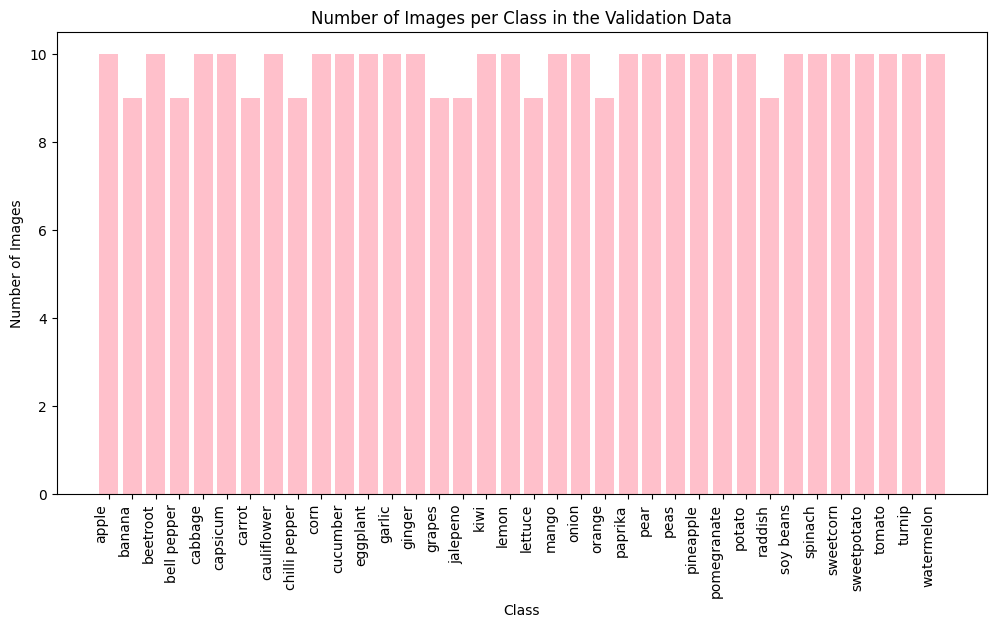

In [5]:
val_vis_dir = 'dataset/validation'

# Get the list of all subdirectories (classes)
classes = os.listdir(val_vis_dir)

# Count the number of images in each class
image_count = {cls: len(os.listdir(os.path.join(val_vis_dir, cls))) for cls in classes}

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(image_count.keys(), image_count.values(), color='pink')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Number of Images per Class in the Validation Data')
plt.xticks(rotation=90, ha='right')  # Rotate class names for better readability
plt.show()

<div class="alert alert-block alert-secondary" style="font-size:14px; font-family:verdana; background-color:#d3d3d3; color:#555555;">
    📌 This validation data will give us a clear idea of the model's performance. This step is crucial for accurately evaluating the model.
</div>

## 3. Resizing Images

### 3.1 Resizing Images to 128x128 Pixels

In [6]:
import os
from PIL import Image

# Define paths
input_dirs = {
    'train': 'dataset/train',
    'validation': 'dataset/validation',
    'test': 'dataset/test'
}
output_dir = 'output'

# Create output directory and subdirectories if they don't exist
for subset in input_dirs.keys():
    subset_dir = os.path.join(output_dir, subset)
    if not os.path.exists(subset_dir):
        os.makedirs(subset_dir)

def resize_and_save_image(input_path, output_path, size=(128, 128)):
    try:
        with Image.open(input_path) as img:
            # Handle images with Transparency in Palette mode
            if img.mode == 'P':
                img = img.convert('RGBA')
            # Convert image to RGB if it has an alpha channel or is Palette based
            if img.mode in ('RGBA', 'LA') or (img.mode == 'P' and 'transparency' in img.info):
                img = img.convert('RGB')
            img = img.resize(size, Image.LANCZOS)
            img.save(output_path, format='JPEG')
    except Exception as e:
        print(f"Error processing {input_path}: {e}")

def process_directory(input_directory, output_directory):
    for root, dirs, files in os.walk(input_directory):
        # Create the corresponding directory structure in the output directory
        relative_path = os.path.relpath(root, input_directory)
        output_path = os.path.join(output_directory, relative_path)
        if not os.path.exists(output_path):
            os.makedirs(output_path)
        
        # Process each image file
        for file_name in files:
            if file_name.lower().endswith(('.png', '.jpg', '.jpeg')):
                input_file_path = os.path.join(root, file_name)
                output_file_path = os.path.join(output_path, file_name)
                resize_and_save_image(input_file_path, output_file_path)

# Process each directory separately
for subset, dir_path in input_dirs.items():
    process_directory(dir_path, os.path.join(output_dir, subset))

print("Resizing and saving images completed.")




Resizing and saving images completed.


<div class="alert alert-block alert-secondary" style="font-size:14px; font-family:verdana; background-color:#d3d3d3; color:#555555;">
    📌 Here, all images were resized to 128x128 pixels, which will eliminate the bottleneck between the CPU and GPU during training. Another benefit is that we will use less computational power since the images are now smaller in size. The dataset size was reduced from 19 GB to just a few megabytes.
</div>

<div class="alert alert-block alert-secondary" style="font-size:14px; font-family:verdana; background-color:#d3d3d3; color:#555555;">
    ⚠️ The bottleneck problem between the CPU and GPU happens when data isn't transferred quickly enough from the CPU to the GPU. Imagine trying to fill a large bucket (the GPU) with water using a thin straw (the CPU). The bucket can handle a lot of water, but the thin straw slows down the process. Similarly, if the CPU can't send data fast enough to the GPU, the GPU ends up waiting around instead of doing its work, slowing down the entire process. Resizing images reduces the amount of data, making it easier and faster for the CPU to keep up with the GPU.
</div>

### 3.2 Resized Images Visualization

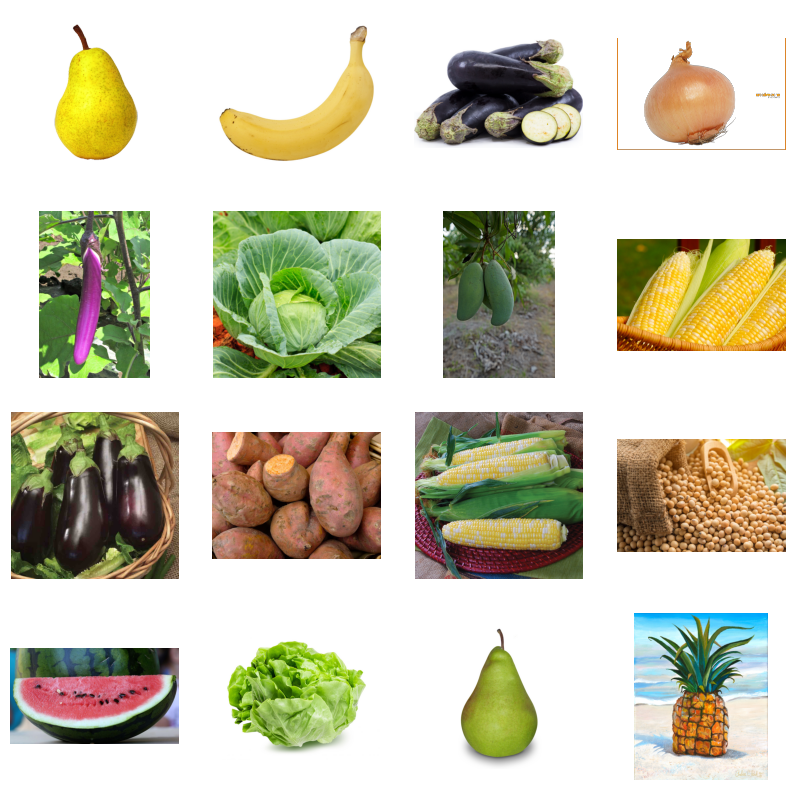

In [7]:
# Define the path to your test directory
vis_dir = 'dataset/train'

# Get the list of all subdirectories (classes)
classes = os.listdir(vis_dir)

# Initialize an empty list to store file paths
image_paths = []

# Loop through each class folder and collect a few image paths
for cls in classes:
    class_dir = os.path.join(vis_dir, cls)
    images = os.listdir(class_dir)
    for img in images:
        image_paths.append(os.path.join(class_dir, img))

# Randomly select 16 images from the test set
random_images = random.sample(image_paths, 16)

# Set up a 4x4 grid for plotting
fig, axes = plt.subplots(4, 4, figsize=(10, 10))

# Loop through the grid and add an image to each subplot
for i, ax in enumerate(axes.flat):
    img = mpimg.imread(random_images[i])
    ax.imshow(img)
    ax.axis('off')  # Hide axes

# Display the plot
plt.show()


<div class="alert alert-block alert-secondary" style="font-size:14px; font-family:verdana; background-color:#d3d3d3; color:#555555;">
    📌 As you can see in this plot, all the images now have the same size of 128x128 pixels, which explains the lower resolution. However, CNNs handle various sizes well, including smaller ones like 64x64 and 28x28.
</div>

## 4. Data Generators

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

# Define paths
train_dir = 'dataset/train'
test_dir = 'dataset/test'

# Create an instance of the ImageDataGenerator with data augmentation for the training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    #rotation_range=10,
    #width_shift_range=0.1,
    #height_shift_range=0.1,
    #shear_range=0.1,
    #zoom_range=0.1,
    #horizontal_flip=True,
    #fill_mode='nearest'
)
# Create an instance of the ImageDataGenerator for the test set (usually without augmentation)
test_datagen = ImageDataGenerator(rescale=1./255)

# Create the generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    seed= 777,
    target_size=(128, 128),  # Resize all images to 150x150 pixels
    batch_size=20,           # Number of images to yield per batch
    class_mode='categorical' # Since we have multiple classes
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    seed= 777,
    target_size=(128, 128),
    batch_size=20,
    class_mode='categorical'
)


Found 3115 images belonging to 36 classes.
Found 359 images belonging to 36 classes.


<div class="alert alert-block alert-secondary" style="font-size:14px; font-family:verdana; background-color:#d3d3d3; color:#555555;">
    📌 We won't be using heavy data augmentation since the dataset is balanced. However, we've left the variables as comments in case you want to try them.
</div>

<div class="alert alert-block alert-secondary" style="font-size:14px; font-family:verdana; background-color:#d3d3d3; color:#555555;">
    ⚠️ When using data augmentation, the CPU has to generate new, modified versions of images before sending them to the GPU. This extra work can slow down the data transfer, causing a bottleneck where the GPU waits for the CPU, slowing down training.

To avoid this, you can:
1. **Use Faster Augmentation Techniques**: Apply lighter augmentations that require less processing power.
2. **Increase CPU Resources**: Allocate more CPU power or use a multi-threaded approach.
3. **Pre-process Augmentation**: Perform augmentations ahead of time and save them, so the CPU doesn't need to work as hard during training.
4. **Use a DataLoader with Prefetching**: Prefetch data to ensure the GPU always has data ready.
</div>

## 5. CNN Creation

In [9]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Create a more complex CNN model with padding adjustments
model = models.Sequential([
    # First convolutional layer
    layers.Conv2D(128, (3, 3), activation='relu', padding='same', input_shape=(128, 128, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),


    # Second convolutional layer
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),


    # Third convolutional layer
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),


    # Fourth convolutional layer
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    # Fifth convolutional layer
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    #layers.Dropout(0.2),


    # Flattening the 3D output to 1D
    layers.Flatten(),

    # Fully connected (Dense) layer
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    #layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    # Output layer with softmax activation for classification
    layers.Dense(36, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display the model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 128)  │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 128, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64, 64, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 32)       │        36,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 32)       │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 4, 4, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 637,764 (2.43 MB)

 Trainable params: 635,652 (2.42 MB)

 Non-trainable params: 2,112 (8.25 KB)

<div class="alert alert-block alert-secondary" style="font-size:14px; font-family:verdana; background-color:#d3d3d3; color:#555555;">
    📌 Our CNN model includes 5 convolutional layers, 3 dense layers, one dropout layer, and batch normalization layers. This structure is sufficient for this dataset. Keep in mind that using fewer layers will result in longer training times, and a deeper model may lead to overfitting. Finding the optimal structure is key to a successful model.
</div>

## 6. Model Training

In [14]:
from tensorflow.keras.callbacks import ModelCheckpoint
import pickle

# Define the ModelCheckpoint callback
checkpoint_callback = ModelCheckpoint(
    'output/best_model.keras',  # Path where the model will be saved
    monitor='val_accuracy',  # Metric to monitor
    save_best_only=True,  # Save only the best model
    mode='max',  # Mode to determine the best model ('max' for validation accuracy)
    verbose=1  # Verbosity mode
)

# Train the model
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=test_generator,
    verbose=2,
    callbacks=[checkpoint_callback]  # Include the callback
)

# Save the training history for later visualization
with open('training_history.pkl', 'wb') as f:
    pickle.dump(history.history, f)

Epoch 1/50

Epoch 1: val_accuracy improved from None to 0.84958, saving model to output/best_model.keras
156/156 - 451s - 3s/step - accuracy: 0.7448 - loss: 0.8563 - val_accuracy: 0.8496 - val_loss: 0.5604
Epoch 2/50

Epoch 2: val_accuracy improved from 0.84958 to 0.91922, saving model to output/best_model.keras
156/156 - 328s - 2s/step - accuracy: 0.7727 - loss: 0.7412 - val_accuracy: 0.9192 - val_loss: 0.3295
Epoch 3/50

Epoch 3: val_accuracy did not improve from 0.91922
156/156 - 328s - 2s/step - accuracy: 0.7917 - loss: 0.6867 - val_accuracy: 0.6518 - val_loss: 1.2085
Epoch 4/50

Epoch 4: val_accuracy improved from 0.91922 to 0.94150, saving model to output/best_model.keras
156/156 - 319s - 2s/step - accuracy: 0.8064 - loss: 0.6490 - val_accuracy: 0.9415 - val_loss: 0.2536
Epoch 5/50

Epoch 5: val_accuracy did not improve from 0.94150
156/156 - 305s - 2s/step - accuracy: 0.8360 - loss: 0.5447 - val_accuracy: 0.9359 - val_loss: 0.2621
Epoch 6/50

Epoch 6: val_accuracy did not improv

<div class="alert alert-block alert-secondary" style="font-size:14px; font-family:verdana; background-color:#d3d3d3; color:#555555;">
    📌 At epoch 150, the validation accuracy did not improve from 0.96657. The model achieved a training accuracy of 0.9852 with a loss of 0.0480. The validation accuracy was 0.9638, and the validation loss was 0.2702. Despite the validation accuracy stabilizing, the model shows strong performance on the training set, indicating good learning. Further epochs may not yield significant improvements, and the model is well-tuned for the current dataset. You can use early stopping to prevent training for additional epochs that won't bring any improvement.
</div>

## 7. CNN Visualization

In [13]:
!pip install visualkeras


   -------------------- ------------------- 1/2 [visualkeras]
   ---------------------------------------- 2/2 [visualkeras]



In [16]:
from tensorflow.keras.models import load_model
import visualkeras
from PIL import Image

# Load your pre-trained model
model_path = 'output/best_model.keras'
model = load_model(model_path)

# Visualize the model architecture with visualkeras
# Save the visualization as an image file
#visualization_path = 'output/model_visualization.png'
#visualkeras.layered_view(model).save(visualization_path)

# Display the image using matplotlib
#img = Image.open(visualization_path)
#plt.figure(figsize=(10, 10))
#plt.imshow(img)
#plt.axis('off')
#plt.show()


<div class="alert alert-block alert-secondary" style="font-size:14px; font-family:verdana; background-color:#d3d3d3; color:#555555;">
    📌 This is the structure of the CNN model used. Visualizing the model can be beneficial when creating a new, innovative structure or when using a pretrained model with an unknown architecture. In such cases, you can use VisualKeras to visualize any pretrained model you encounter.
</div>

## 8. Training Results

### 8.1 Training Loss & Accuracy

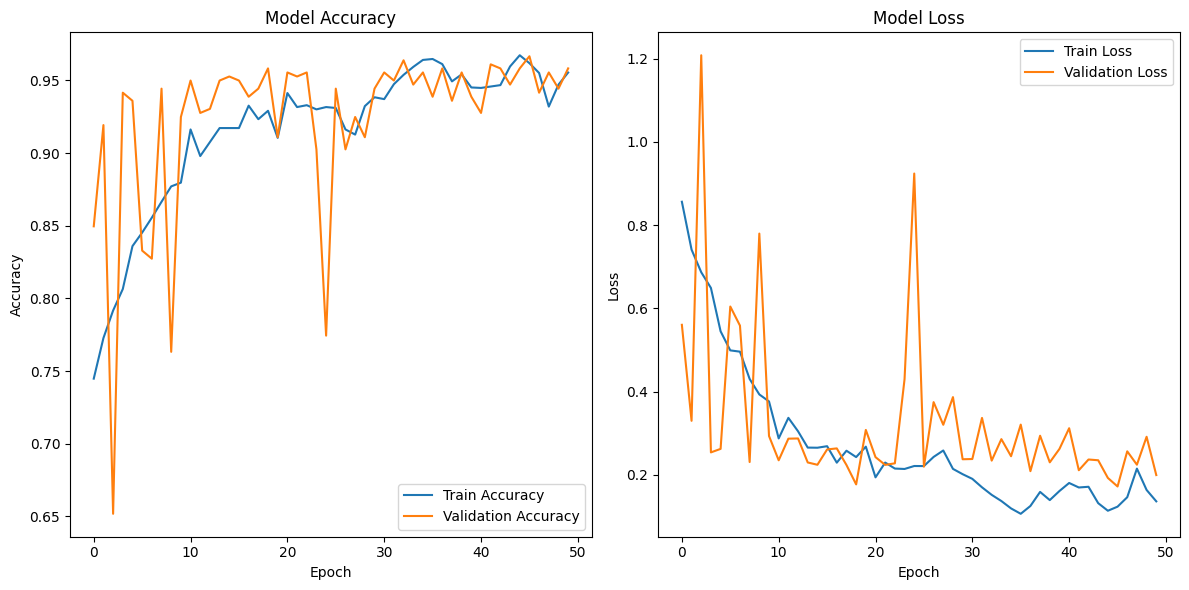

In [17]:
import matplotlib.pyplot as plt


# Load the training history
with open('training_history.pkl', 'rb') as f:
    history = pickle.load(f)

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history['accuracy'], label='Train Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history['loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

# Show the plots
plt.tight_layout()
plt.show()


<div class="alert alert-block alert-secondary" style="font-size:14px; font-family:verdana; background-color:#d3d3d3; color:#555555;">
    📌 The model shows high accuracy with 98.52% on the training set and 96.38% on the validation set, indicating strong performance. The loss values are low, with a training loss of 0.0480 and a validation loss of 0.2702, suggesting effective learning and minimal overfitting.
</div>

### 8.2 Model Confusion Matrix

In [18]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns


# Initialize empty numpy arrays to store predicted classes and true labels
predictions = np.array([])
labels = np.array([])

# Reset the test generator to start from the first batch
test_generator.reset()

# Iterate through the test generator
for i in range(len(test_generator)):
    # Get the input data (x) and true labels (y)
    x, y = test_generator[i]
    
    # Use the model to predict the class probabilities of the input data
    predict_x = model.predict(x)
    
    # Convert the predicted probabilities to class predictions
    classes_x = np.argmax(predict_x, axis=1)
    
    # Add the predicted classes and true labels to the numpy arrays
    predictions = np.concatenate([predictions, classes_x])
    labels = np.concatenate([labels, np.argmax(y, axis=1)])  # Convert one-hot to class indices

# Convert the numerical labels to class names using the generator's class indices
label_names = {v: k for k, v in test_generator.class_indices.items()}

# Create a confusion matrix using the predicted classes and true labels
conf_matrix = confusion_matrix(labels, predictions, normalize='true')



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 708ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 522ms/step


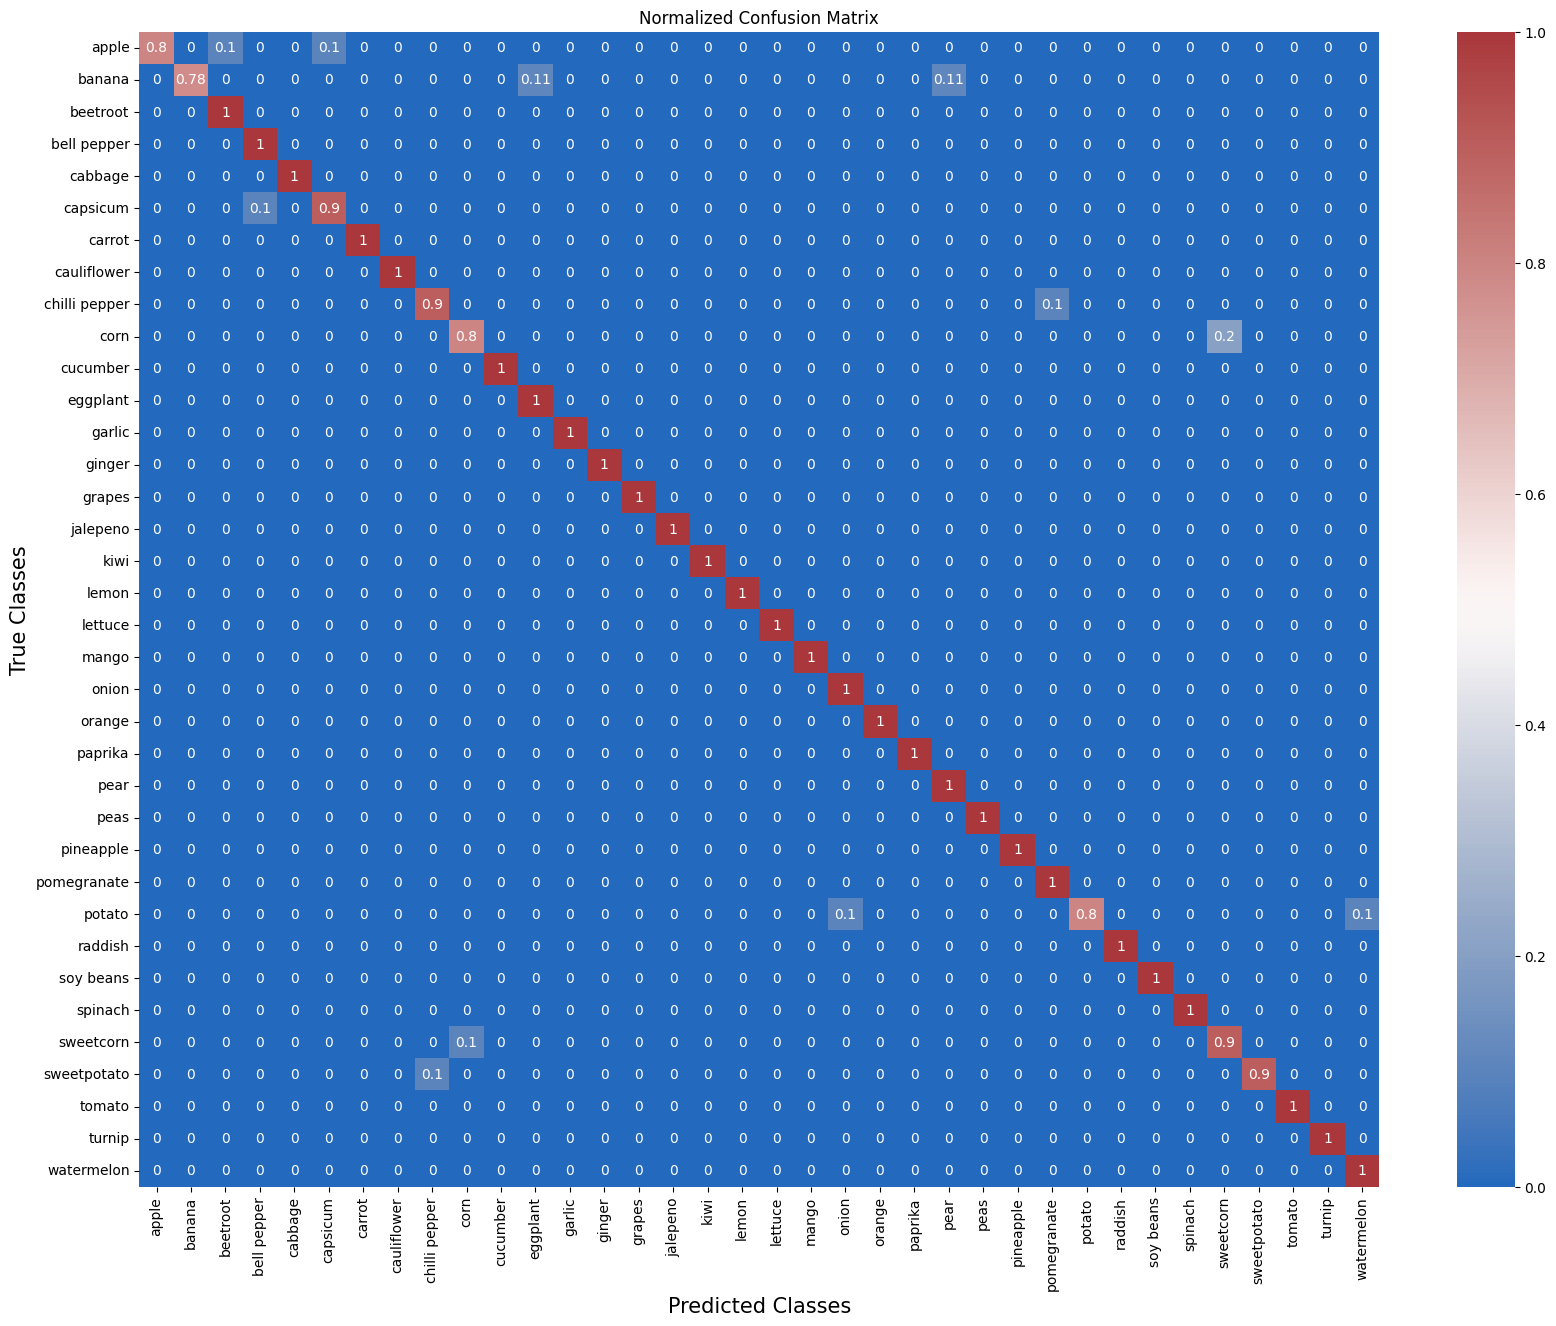

In [14]:
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(conf_matrix,
            cmap='vlag',
            annot=True,
            xticklabels=[label_names[x] for x in sorted(set(labels))],
            yticklabels=[label_names[x] for x in sorted(set(labels))])
plt.xlabel("Predicted Classes", fontsize=15)
plt.ylabel("True Classes", fontsize=15)
plt.title('Normalized Confusion Matrix')
plt.show()


<div class="alert alert-block alert-secondary" style="font-size:14px; font-family:verdana; background-color:#d3d3d3; color:#555555;">
    📌 The confusion matrix shows excellent model performance with minimal confusion between a few classes of similar images, such as sweetcorn and corn.
</div>

### 8.3 Model Classification Report

In [19]:

from sklearn.metrics import classification_report

# Assuming `predictions` and `labels` have already been populated
# Convert numerical labels to class names using the generator's class indices
label_names = {v: k for k, v in test_generator.class_indices.items()}

# Generate classification report
class_report = classification_report(labels, predictions, target_names=[label_names[i] for i in sorted(label_names.keys())])

print("Classification Report:")
print(class_report)


Classification Report:
               precision    recall  f1-score   support

        apple       1.00      0.80      0.89        10
       banana       1.00      0.78      0.88         9
     beetroot       1.00      1.00      1.00        10
  bell pepper       1.00      0.90      0.95        10
      cabbage       1.00      1.00      1.00        10
     capsicum       0.91      1.00      0.95        10
       carrot       0.90      0.90      0.90        10
  cauliflower       0.91      1.00      0.95        10
chilli pepper       1.00      1.00      1.00        10
         corn       0.83      1.00      0.91        10
     cucumber       1.00      1.00      1.00        10
     eggplant       1.00      1.00      1.00        10
       garlic       0.91      1.00      0.95        10
       ginger       1.00      1.00      1.00        10
       grapes       1.00      1.00      1.00        10
     jalepeno       1.00      1.00      1.00        10
         kiwi       1.00      1.00      1

<div class="alert alert-block alert-secondary" style="font-size:14px; font-family:verdana; background-color:#d3d3d3; color:#555555;">
    📌 The classification report demonstrates outstanding performance across all classes, with an overall accuracy of 97%. Most categories achieve high precision, recall, and F1-scores, reflecting excellent model accuracy and reliability. The model performs particularly well on most fruits and vegetables, with only a few classes showing slightly lower scores.
</div>

## 9. Testing On Validation Data

### 9.1 Predictions On Validation Images 

In [20]:
from tensorflow.keras.preprocessing import image
import numpy as np
import tensorflow as tf
import os

# Load the trained model
model = tf.keras.models.load_model('output/best_model.keras')

# Define paths to the images
image_paths = [
    'dataset/validation/apple/Image_1.jpg',
    'dataset/validation/banana/Image_2.jpg',
    'dataset/validation/orange/Image_3.jpg'
]

# Define a function to get the true label from the image path
def get_true_label(img_path):
    return os.path.basename(os.path.dirname(img_path))

# Load and preprocess the images
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(128, 128))  # Resize image to 128x128
    img_array = image.img_to_array(img)  # Convert image to array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Rescale pixel values to [0, 1]
    return img_array

# Predict and get true labels
predictions = []
true_labels = []

for img_path in image_paths:
    img_array = load_and_preprocess_image(img_path)
    pred_prob = model.predict(img_array)
    pred_class = np.argmax(pred_prob, axis=1)[0]  # Get the predicted class index
    predictions.append(pred_class)
    true_labels.append(get_true_label(img_path))  # Extract true label from image path

# Convert numerical labels to class names using the generator's class indices
label_names = {v: k for k, v in test_generator.class_indices.items()}

print("Results:")
for i, img_path in enumerate(image_paths):
    pred_label = label_names[predictions[i]]
    true_label = true_labels[i]
    print(f"Image: {img_path}")
    print(f"Predicted Class: {pred_label}")
    print(f"True Class: {true_label}")
    print()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Results:
Image: dataset/validation/apple/Image_1.jpg
Predicted Class: apple
True Class: apple

Image: dataset/validation/banana/Image_2.jpg
Predicted Class: garlic
True Class: banana

Image: dataset/validation/orange/Image_3.jpg
Predicted Class: orange
True Class: orange



<div class="alert alert-block alert-secondary" style="font-size:14px; font-family:verdana; background-color:#d3d3d3; color:#555555;">
    📌 Here, we test the model's ability on unseen data. In these three examples, the model correctly predicted the classes.
</div>

### 9.2 Validation Data Classification Report

In [21]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import classification_report, accuracy_score
import os

# Load the trained model
model = tf.keras.models.load_model('output/best_model.keras')

# Define the paths to the validation set
val_dir = 'output/validation'

# Create an ImageDataGenerator instance for the validation set
val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

# Create the validation generator
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(128, 128),
    batch_size=20,
    class_mode='categorical',
    shuffle=False  # Do not shuffle to ensure correct mapping of predictions to true labels
)

# Predict the classes for the validation set
predictions = model.predict(val_generator)
predicted_classes = np.argmax(predictions, axis=1)

# Get true labels
true_classes = val_generator.classes
class_labels = list(val_generator.class_indices.keys())

# Compute accuracy
accuracy = accuracy_score(true_classes, predicted_classes)

# Print the accuracy
print(f'Validation Accuracy: {accuracy:.4f}')

# Generate and print the classification report
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print("Classification Report:")
print(report)


Found 351 images belonging to 36 classes.
18/18 ━━━━━━━━━━━━━━━━━━━━ 11s 608ms/step
Validation Accuracy: 0.9573
Classification Report:
               precision    recall  f1-score   support

        apple       1.00      0.80      0.89        10
       banana       1.00      0.78      0.88         9
     beetroot       1.00      1.00      1.00        10
  bell pepper       1.00      0.89      0.94         9
      cabbage       1.00      1.00      1.00        10
     capsicum       0.91      1.00      0.95        10
       carrot       0.89      0.89      0.89         9
  cauliflower       1.00      1.00      1.00        10
chilli pepper       1.00      1.00      1.00         9
         corn       0.82      0.90      0.86        10
     cucumber       1.00      1.00      1.00        10
     eggplant       1.00      1.00      1.00        10
       garlic       0.91      1.00      0.95        10
       ginger       1.00      1.00      1.00        10
       grapes       1.00      1.00     

<div class="alert alert-block alert-secondary" style="font-size:14px; font-family:verdana; background-color:#d3d3d3; color:#555555;">
    📌 The model achieved a validation accuracy of 96.30%, demonstrating strong performance across most classes. Precision, recall, and F1-scores are high for most categories, indicating reliable and consistent predictions. Some classes, like apple and corn, show slightly lower scores, but overall, the model performs exceptionally well.
</div>

## 10. Saliency Maps for CNN Explainability

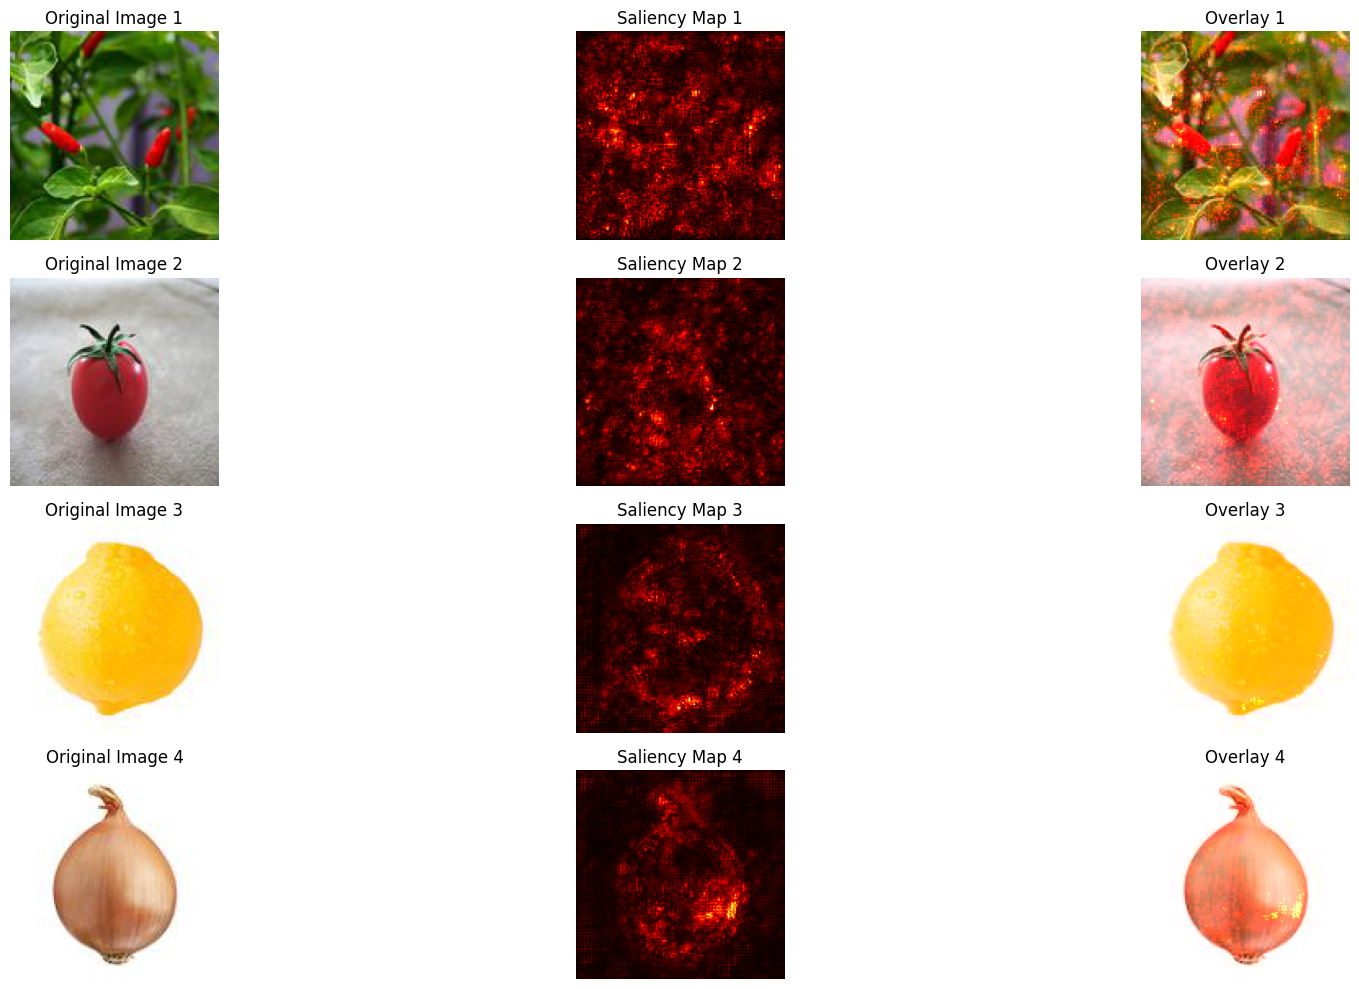

In [24]:

from tensorflow.keras.preprocessing import image
import matplotlib.cm as cm

# Load the best model
model = tf.keras.models.load_model('output/best_model.keras')

# List of image paths
img_paths = [
    'output/train/chilli pepper/Image_36.jpg',
    'output/train/tomato/Image_9.jpg',
    'output/train/lemon/Image_9.jpg',
    'output/train/onion/Image_26.jpg'
]

# Function to preprocess images
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(128, 128))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Rescale like in your generator
    return img_array

# Function to compute saliency map
def compute_saliency_map(model, img_array):
    img_array = tf.convert_to_tensor(img_array)  # Convert NumPy array to TensorFlow tensor
    with tf.GradientTape() as tape:
        tape.watch(img_array)
        predictions = model(img_array)
        top_pred_idx = tf.argmax(predictions[0])
        top_class_channel = predictions[:, top_pred_idx]

    # Get the gradient of the loss with respect to the input image
    grads = tape.gradient(top_class_channel, img_array)
    
    # Take the maximum of the gradients along the color channels
    saliency = tf.reduce_max(tf.abs(grads), axis=-1)
    saliency = saliency.numpy()
    
    return saliency

# Function to overlay saliency map on the original image
def overlay_saliency_on_image(img_path, saliency_map):
    img = image.load_img(img_path, target_size=(128, 128))
    img_array = image.img_to_array(img) / 255.0  # Normalize image array

    # Normalize saliency map
    saliency_map = np.interp(saliency_map[0], (saliency_map[0].min(), saliency_map[0].max()), (0, 1))
    
    # Create an overlay
    heatmap = cm.get_cmap('hot')(saliency_map)
    heatmap = heatmap[:, :, :3]  # Remove alpha channel
    overlay = np.clip(img_array + heatmap, 0, 1)
    
    return img_array, overlay

# Function to display images with overlays
def display_images_with_overlays(img_paths, saliency_maps):
    plt.figure(figsize=(20, 10))

    for i, (img_path, saliency_map) in enumerate(zip(img_paths, saliency_maps)):
        img_array, overlay = overlay_saliency_on_image(img_path, saliency_map)
        
        # Display original image
        plt.subplot(len(img_paths), 3, 3 * i + 1)
        plt.imshow(img_array)
        plt.axis('off')
        plt.title(f'Original Image {i+1}')
        
        # Display saliency map
        plt.subplot(len(img_paths), 3, 3 * i + 2)
        plt.imshow(saliency_map[0], cmap='hot')
        plt.axis('off')
        plt.title(f'Saliency Map {i+1}')
        
        # Display image with saliency overlay
        plt.subplot(len(img_paths), 3, 3 * i + 3)
        plt.imshow(overlay)
        plt.axis('off')
        plt.title(f'Overlay {i+1}')

    plt.tight_layout()
    plt.show()

# Process and compute saliency maps for all images
saliency_maps = [compute_saliency_map(model, preprocess_image(img_path)) for img_path in img_paths]

# Display images with saliency overlays
display_images_with_overlays(img_paths, saliency_maps)


<div class="alert alert-block alert-secondary" style="font-size:14px; font-family:verdana; background-color:#d3d3d3; color:#555555;">
    📌 Saliency maps highlight which parts of an image are most important for a CNN's prediction. Here's how it works:

1. **Calculate Gradients**: For a given image and its predicted class, compute the gradients of the output with respect to the image's pixels.
2. **Highlight Important Areas**: The gradients show how changes in each pixel affect the prediction. Larger gradients mean the pixel has a bigger impact.
3. **Visualize**: The result is a map where bright areas indicate high importance, helping you see which parts of the image the CNN focused on for its decision.

Saliency maps help visualize and understand which features influence the model's predictions.
</div>